In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Final Project/Final Project/Dataset/heart.csv"
data=  pd.read_csv(path)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

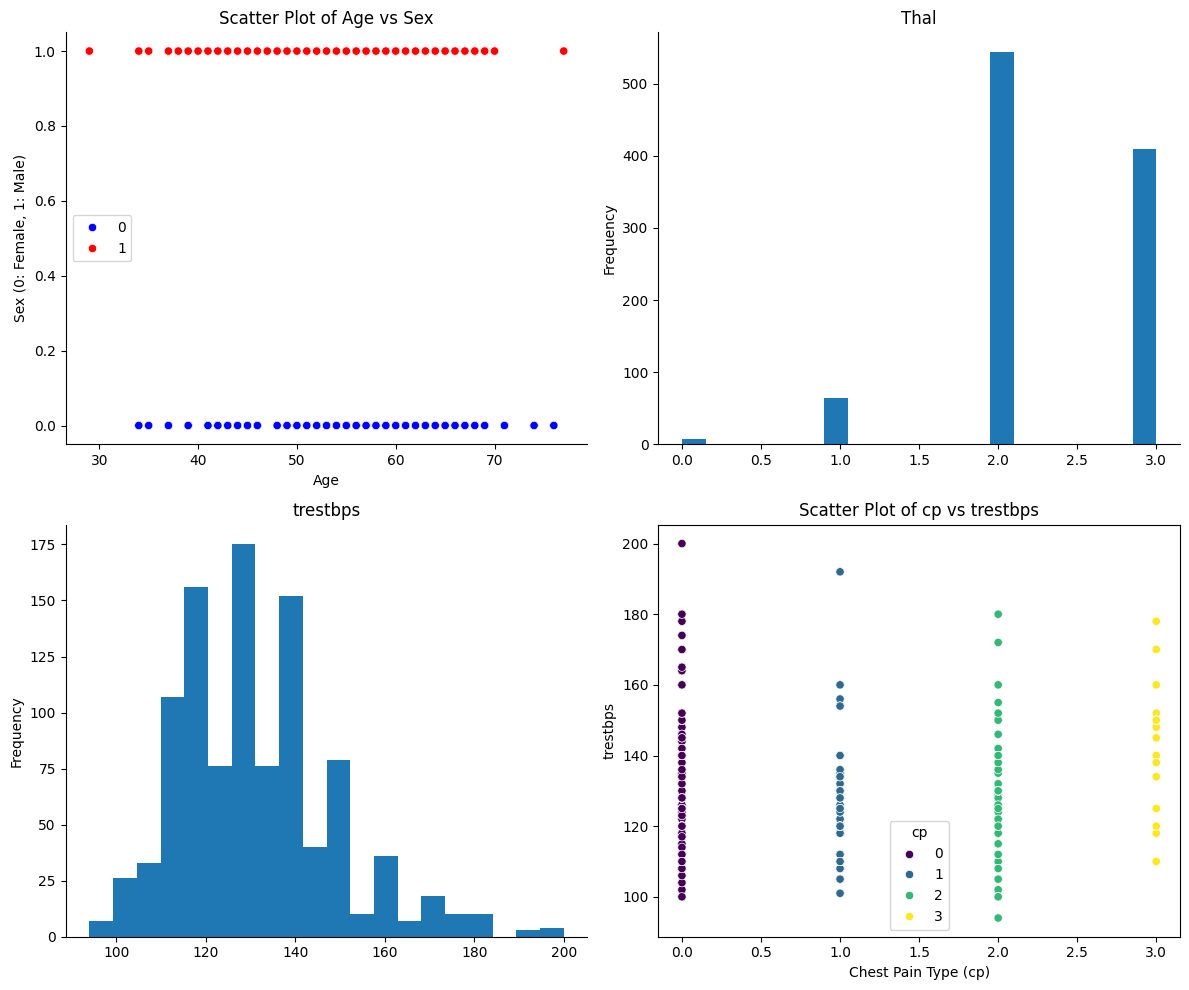

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

scatter_age_sex = sns.scatterplot(x='age', y='sex', data=data, ax=axes[0, 0], hue='sex', palette={0: 'blue', 1: 'red'})
scatter_age_sex.set_xlabel('Age')
scatter_age_sex.set_ylabel('Sex (0: Female, 1: Male)')
scatter_age_sex.set_title('Scatter Plot of Age vs Sex')
scatter_age_sex.spines[['top', 'right']].set_visible(False)
scatter_age_sex.legend(loc='center left')

data['thal'].plot(kind='hist', bins=20, title='Thal', ax=axes[0, 1])
axes[0, 1].spines[['top', 'right']].set_visible(False)

data['trestbps'].plot(kind='hist', bins=20, title='trestbps', ax=axes[1, 0])
axes[1, 0].spines[['top', 'right']].set_visible(False)

scatter_cp_trestbps = sns.scatterplot(x='cp', y='trestbps', data=data, ax=axes[1, 1], hue='cp', palette='viridis')
scatter_cp_trestbps.set_xlabel('Chest Pain Type (cp)')
scatter_cp_trestbps.set_ylabel('trestbps')
scatter_cp_trestbps.set_title('Scatter Plot of cp vs trestbps')

plt.tight_layout()
plt.show()


In [ ]:
print(data.head())
print(data.shape)
print(data['target'].value_counts())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
target
1    526
0    499
Name: count, dtype: int64


Train Test Split

In [ ]:
newdata=data.dropna(axis=0,how='any')
print(newdata.shape)
X = data.drop('target', axis=1)
Y = data['target']
Y=pd.DataFrame(Y)
print(X.shape)
print(Y.shape)
print(Y)
type(X)
type(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train.mean(), X_test.mean(), X.mean())

(1025, 14)
(1025, 13)
(1025, 1)
      target
0          0
1          0
2          0
3          0
4          0
...      ...
1020       1
1021       0
1022       0
1023       1
1024       0

[1025 rows x 1 columns]
(717, 13) (308, 13) (717, 1) (308, 1)
age          54.334728
sex           0.670851
cp            0.921897
trestbps    131.690377
chol        246.640167
fbs           0.152022
restecg       0.545328
thalach     149.377964
exang         0.340307
oldpeak       1.071967
slope         1.386332
ca            0.754533
thal          2.327755
dtype: float64 age          54.665584
sex           0.753247
cp            0.990260
trestbps    131.428571
chol        244.509740
fbs           0.142857
restecg       0.493506
thalach     148.500000
exang         0.327922
oldpeak       1.070455
slope         1.383117
ca            0.753247
thal          2.314935
dtype: float64 age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs   

Support Vector Classifier- Linear

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, np.ravel(Y_train))
y_pred = svclassifier.predict(X_test)

# Metrics before k-fold cross-validation
accuracy_before = accuracy_score(Y_test, y_pred)
precision_before = precision_score(Y_test, y_pred)
recall_before = recall_score(Y_test, y_pred)
f1_before = f1_score(Y_test, y_pred)

print("Metrics Before K-Fold Cross-Validation for SVM-linear:")
print("Accuracy =", accuracy_before * 100)
print("Precision =", precision_before * 100)
print("Recall =", recall_before * 100)
print("F1 =", f1_before)

print("\nBoosting Classifier with K-Fold Validation")
boostclassifier = AdaBoostClassifier(base_estimator=svclassifier, algorithm="SAMME", n_estimators=150)

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomes_accuracy = []
    outcomes_precision = []
    outcomes_recall = []
    outcomes_f1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train_fold, X_test_fold = X.values[train_index], X.values[test_index]
        y_train_fold, y_test_fold = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train_fold, np.ravel(y_train_fold))
        predictions = clf.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, predictions)
        precision_fold = precision_score(y_test_fold, predictions)
        recall_fold = recall_score(y_test_fold, predictions)
        f1_fold = f1_score(y_test_fold, predictions)

        outcomes_accuracy.append(accuracy_fold)
        outcomes_precision.append(precision_fold)
        outcomes_recall.append(recall_fold)
        outcomes_f1.append(f1_fold)

        print("Fold {0} accuracy: {1}".format(fold, accuracy_fold))
        print("Fold {0} precision: {1}".format(fold, precision_fold))
        print("Fold {0} recall: {1}".format(fold, recall_fold))
        print("Fold {0} f1: {1}".format(fold, f1_fold))

    # Metrics after k-fold cross-validation by applying K fold to the entire data in X_test
    y_pred_after_cv = clf.predict(X_test)
    accuracy_after = accuracy_score(Y_test, y_pred_after_cv)
    precision_after = precision_score(Y_test, y_pred_after_cv)
    recall_after = recall_score(Y_test, y_pred_after_cv)
    f1_after = f1_score(Y_test, y_pred_after_cv)

    print("\nMetrics After K-Fold Cross-Validation for SVM-linear:")
    print("Accuracy =", accuracy_after * 100)
    print("Precision =", precision_after * 100)
    print("Recall =", recall_after * 100)
    print("F1 =", f1_after)

    # Classification report after k-fold cross-validation
    print("\nClassification Report After K-Fold Cross-Validation:")
    print(classification_report(Y_test, y_pred_after_cv))


run_kfold(boostclassifier)


Metrics Before K-Fold Cross-Validation for SVM-linear:
Accuracy = 84.4155844155844
Precision = 79.8913043478261
Recall = 93.0379746835443
F1 = 0.8596491228070176

Boosting Classifier with K-Fold Validation


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 1 accuracy: 0.8252427184466019
Fold 1 precision: 0.7758620689655172
Fold 1 recall: 0.9
Fold 1 f1: 0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 2 accuracy: 0.8349514563106796
Fold 2 precision: 0.8064516129032258
Fold 2 recall: 0.9090909090909091
Fold 2 f1: 0.8547008547008547


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 3 accuracy: 0.8640776699029126
Fold 3 precision: 0.8484848484848485
Fold 3 recall: 0.9333333333333333
Fold 3 f1: 0.888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 4 accuracy: 0.7864077669902912
Fold 4 precision: 0.7719298245614035
Fold 4 recall: 0.8301886792452831
Fold 4 f1: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 5 accuracy: 0.8349514563106796
Fold 5 precision: 0.7910447761194029
Fold 5 recall: 0.9464285714285714
Fold 5 f1: 0.8617886178861788


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 6 accuracy: 0.8235294117647058
Fold 6 precision: 0.8076923076923077
Fold 6 recall: 0.84
Fold 6 f1: 0.8235294117647058


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 7 accuracy: 0.7058823529411765
Fold 7 precision: 0.6610169491525424
Fold 7 recall: 0.7959183673469388
Fold 7 f1: 0.7222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 8 accuracy: 0.7745098039215687
Fold 8 precision: 0.7719298245614035
Fold 8 recall: 0.8148148148148148
Fold 8 f1: 0.7927927927927928


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 9 accuracy: 0.7156862745098039
Fold 9 precision: 0.6271186440677966
Fold 9 recall: 0.8409090909090909
Fold 9 f1: 0.7184466019417475


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 10 accuracy: 0.7647058823529411
Fold 10 precision: 0.7719298245614035
Fold 10 recall: 0.8
Fold 10 f1: 0.7857142857142858

Metrics After K-Fold Cross-Validation for SVM-linear:
Accuracy = 81.81818181818183
Precision = 78.33333333333333
Recall = 89.24050632911393
F1 = 0.8343195266272189

Classification Report After K-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.78      0.89      0.83       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


KNN with 1 neighbours


In [ ]:
knnclassifier = KNeighborsClassifier(n_neighbors=1)
knnclassifier.fit(X_train, np.ravel(Y_train))
y_pred_before = knnclassifier.predict(X_test)

# Metrics before k-fold cross-validation
accuracy_before = accuracy_score(Y_test, y_pred_before)
precision_before = precision_score(Y_test, y_pred_before)
recall_before = recall_score(Y_test, y_pred_before)
f1_before = f1_score(Y_test, y_pred_before)

print("Metrics Before K-Fold Cross-Validation for KNN-1 neighbor:")
print("Accuracy =", accuracy_before * 100)
print("Precision =", precision_before * 100)
print("Recall =", recall_before * 100)
print("F1 =", f1_before)

print("\nBagging Classifier with K-Fold Validation")
baggclassifier = BaggingClassifier(base_estimator=knnclassifier, n_estimators=300)

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomes_accuracy = []
    outcomes_precision = []
    outcomes_recall = []
    outcomes_f1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train_fold, X_test_fold = X.values[train_index], X.values[test_index]
        y_train_fold, y_test_fold = Y.values[train_index], Y.values[test_index]

        clf.fit(X_train_fold, np.ravel(y_train_fold))
        predictions = clf.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, predictions)
        precision_fold = precision_score(y_test_fold, predictions)
        recall_fold = recall_score(y_test_fold, predictions)
        f1_fold = f1_score(y_test_fold, predictions)

        outcomes_accuracy.append(accuracy_fold)
        outcomes_precision.append(precision_fold)
        outcomes_recall.append(recall_fold)
        outcomes_f1.append(f1_fold)

        print("Fold {0} accuracy: {1}".format(fold, accuracy_fold))
        print("Fold {0} precision: {1}".format(fold, precision_fold))
        print("Fold {0} recall: {1}".format(fold, recall_fold))
        print("Fold {0} f1: {1}".format(fold, f1_fold))

    # Metrics after k-fold cross-validation
    y_pred_after_cv = clf.predict(X_test)
    accuracy_after = accuracy_score(Y_test, y_pred_after_cv)
    precision_after = precision_score(Y_test, y_pred_after_cv)
    recall_after = recall_score(Y_test, y_pred_after_cv)
    f1_after = f1_score(Y_test, y_pred_after_cv)

    print("\nMetrics After K-Fold Cross-Validation for KNN-1 neighbor:")
    print("Accuracy =", accuracy_after * 100)
    print("Precision =", precision_after * 100)
    print("Recall =", recall_after * 100)
    print("F1 =", f1_after)

    # Classification report after k-fold cross-validation
    print("\nClassification Report After K-Fold Cross-Validation:")
    print(classification_report(Y_test, y_pred_after_cv))


run_kfold(baggclassifier)


Metrics Before K-Fold Cross-Validation for KNN-1 neighbor:
Accuracy = 99.02597402597402
Precision = 98.13664596273291
Recall = 100.0
F1 = 0.9905956112852665

Bagging Classifier with K-Fold Validation


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 4 accuracy: 0.970873786407767
Fold 4 precision: 1.0
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.970873786407767


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 5 accuracy: 0.970873786407767
Fold 5 precision: 1.0
Fold 5 recall: 0.9464285714285714
Fold 5 f1: 0.9724770642201834


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 7 accuracy: 0.9705882352941176
Fold 7 precision: 1.0
Fold 7 recall: 0.9387755102040817
Fold 7 f1: 0.968421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 8 accuracy: 1.0
Fold 8 precision: 1.0
Fold 8 recall: 1.0
Fold 8 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 9 accuracy: 1.0
Fold 9 precision: 1.0
Fold 9 recall: 1.0
Fold 9 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fold 10 accuracy: 1.0
Fold 10 precision: 1.0
Fold 10 recall: 1.0
Fold 10 f1: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(



Metrics After K-Fold Cross-Validation for KNN-1 neighbor:
Accuracy = 100.0
Precision = 100.0
Recall = 100.0
F1 = 1.0

Classification Report After K-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       158

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



Decision Tree

In [ ]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, np.ravel(Y_train))
y_pred_before = dtclassifier.predict(X_test)

# Metrics before k-fold cross-validation
accuracy_before = accuracy_score(Y_test, y_pred_before)
precision_before = precision_score(Y_test, y_pred_before)
recall_before = recall_score(Y_test, y_pred_before)
f1_before = f1_score(Y_test, y_pred_before)

print("Metrics Before K-Fold Cross-Validation for Decision Tree:")
print("Accuracy =", accuracy_before * 100)
print("Precision =", precision_before * 100)
print("Recall =", recall_before * 100)
print("F1 =", f1_before)

print("\nBoosting Classifier with K-Fold Validation")
boostclassifier = AdaBoostClassifier(base_estimator=dtclassifier, algorithm="SAMME", n_estimators=50)

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomes_accuracy = []
    outcomes_precision = []
    outcomes_recall = []
    outcomes_f1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train_fold, X_test_fold = X.values[train_index], X.values[test_index]
        y_train_fold, y_test_fold = Y.values[train_index], Y.values[test_index]

        clf.fit(X_train_fold, np.ravel(y_train_fold))
        predictions = clf.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, predictions)
        precision_fold = precision_score(y_test_fold, predictions)
        recall_fold = recall_score(y_test_fold, predictions)
        f1_fold = f1_score(y_test_fold, predictions)

        outcomes_accuracy.append(accuracy_fold)
        outcomes_precision.append(precision_fold)
        outcomes_recall.append(recall_fold)
        outcomes_f1.append(f1_fold)

        print("Fold {0} accuracy: {1}".format(fold, accuracy_fold))
        print("Fold {0} precision: {1}".format(fold, precision_fold))
        print("Fold {0} recall: {1}".format(fold, recall_fold))
        print("Fold {0} f1: {1}".format(fold, f1_fold))

    # Metrics after k-fold cross-validation
    y_pred_after_cv = clf.predict(X_test)
    accuracy_after = accuracy_score(Y_test, y_pred_after_cv)
    precision_after = precision_score(Y_test, y_pred_after_cv)
    recall_after = recall_score(Y_test, y_pred_after_cv)
    f1_after = f1_score(Y_test, y_pred_after_cv)

    print("\nMetrics After K-Fold Cross-Validation for Decision Tree:")
    print("Accuracy =", accuracy_after * 100)
    print("Precision =", precision_after * 100)
    print("Recall =", recall_after * 100)
    print("F1 =", f1_after)

    # Classification report after k-fold cross-validation
    print("\nClassification Report After K-Fold Cross-Validation:")
    print(classification_report(Y_test, y_pred_after_cv))

run_kfold(boostclassifier)


Metrics Before K-Fold Cross-Validation for Decision Tree:
Accuracy = 100.0
Precision = 100.0
Recall = 100.0
F1 = 1.0

Boosting Classifier with K-Fold Validation
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Fold 4 accuracy: 0.970873786407767
Fold 4 precision: 1.0
Fold 4 recall: 0.9433962264150944
Fold 4 f1: 0.970873786407767
Fold 5 accuracy: 0.970873786407767
Fold 5 precision: 1.0
Fold 5 recall: 0.9464285714285714
Fold 5 f1: 0.9724770642201834


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0
Fold 7 accuracy: 1.0
Fold 7 precision: 1.0
Fold 7 recall: 1.0
Fold 7 f1: 1.0
Fold 8 accuracy: 1.0
Fold 8 precision: 1.0
Fold 8 recall: 1.0
Fold 8 f1: 1.0
Fold 9 accuracy: 1.0
Fold 9 precision: 1.0
Fold 9 recall: 1.0
Fold 9 f1: 1.0
Fold 10 accuracy: 1.0
Fold 10 precision: 1.0
Fold 10 recall: 1.0
Fold 10 f1: 1.0

Metrics After K-Fold Cross-Validation for Decision Tree:
Accuracy = 100.0
Precision = 100.0
Recall = 100.0
F1 = 1.0

Classification Report After K-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       158

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Logistic Regression

In [ ]:
warnings.filterwarnings("ignore")

lcclassifier = LogisticRegression(C=1.0, max_iter=100, penalty='l2')


lcclassifier.fit(X_train, np.ravel(Y_train))
y_pred_before = lcclassifier.predict(X_test)

# Metrics before k-fold cross-validation
accuracy_before = accuracy_score(Y_test, y_pred_before)
precision_before = precision_score(Y_test, y_pred_before)
recall_before = recall_score(Y_test, y_pred_before)
f1_before = f1_score(Y_test, y_pred_before)

print("Metrics Before K-Fold Cross-Validation for Logistic Regression:")
print("Accuracy =", accuracy_before * 100)
print("Precision =", precision_before * 100)
print("Recall =", recall_before * 100)
print("F1 =", f1_before)

print("\nBoosting Classifier with K-Fold Validation")
boostclassifier = AdaBoostClassifier(base_estimator=lcclassifier, algorithm="SAMME", n_estimators=150 )

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomes_accuracy = []
    outcomes_precision = []
    outcomes_recall = []
    outcomes_f1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train_fold, X_test_fold = X.values[train_index], X.values[test_index]
        y_train_fold, y_test_fold = Y.values[train_index], Y.values[test_index]

        clf.fit(X_train_fold, np.ravel(y_train_fold))
        predictions = clf.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, predictions)
        precision_fold = precision_score(y_test_fold, predictions)
        recall_fold = recall_score(y_test_fold, predictions)
        f1_fold = f1_score(y_test_fold, predictions)

        outcomes_accuracy.append(accuracy_fold)
        outcomes_precision.append(precision_fold)
        outcomes_recall.append(recall_fold)
        outcomes_f1.append(f1_fold)

        print("Fold {0} accuracy: {1}".format(fold, accuracy_fold))
        print("Fold {0} precision: {1}".format(fold, precision_fold))
        print("Fold {0} recall: {1}".format(fold, recall_fold))
        print("Fold {0} f1: {1}".format(fold, f1_fold))

    # Metrics after k-fold cross-validation
    y_pred_after_cv = clf.predict(X_test)
    accuracy_after = accuracy_score(Y_test, y_pred_after_cv)
    precision_after = precision_score(Y_test, y_pred_after_cv)
    recall_after = recall_score(Y_test, y_pred_after_cv)
    f1_after = f1_score(Y_test, y_pred_after_cv)

    print("\nMetrics After K-Fold Cross-Validation for Logistic Regression:")
    print("Accuracy =", accuracy_after * 100)
    print("Precision =", precision_after * 100)
    print("Recall =", recall_after * 100)
    print("F1 =", f1_after)

    # Classification report after k-fold cross-validation
    print("\nClassification Report After K-Fold Cross-Validation:")
    print(classification_report(Y_test, y_pred_after_cv))

run_kfold(boostclassifier)


Metrics Before K-Fold Cross-Validation for Logistic Regression:
Accuracy = 85.3896103896104
Precision = 82.65895953757226
Recall = 90.50632911392405
F1 = 0.86404833836858

Boosting Classifier with K-Fold Validation
Fold 1 accuracy: 0.8543689320388349
Fold 1 precision: 0.8301886792452831
Fold 1 recall: 0.88
Fold 1 f1: 0.8543689320388349
Fold 2 accuracy: 0.8737864077669902
Fold 2 precision: 0.875
Fold 2 recall: 0.8909090909090909
Fold 2 f1: 0.8828828828828829
Fold 3 accuracy: 0.8446601941747572
Fold 3 precision: 0.8793103448275862
Fold 3 recall: 0.85
Fold 3 f1: 0.864406779661017
Fold 4 accuracy: 0.8446601941747572
Fold 4 precision: 0.8627450980392157
Fold 4 recall: 0.8301886792452831
Fold 4 f1: 0.8461538461538461
Fold 5 accuracy: 0.8349514563106796
Fold 5 precision: 0.819672131147541
Fold 5 recall: 0.8928571428571429
Fold 5 f1: 0.8547008547008548
Fold 6 accuracy: 0.8921568627450981
Fold 6 precision: 0.9148936170212766
Fold 6 recall: 0.86
Fold 6 f1: 0.8865979381443299
Fold 7 accuracy: 0.7

Random Forest

In [ ]:
# Random Forest Classifier
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, np.ravel(Y_train))
y_pred_rf = rfclassifier.predict(X_test)

# Metrics for Random Forest Classifier
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
cm_rf = confusion_matrix(Y_test, y_pred_rf)
sensitivity_rf = cm_rf[0, 0] / (cm_rf[0, 0] + cm_rf[0, 1])
specificity_rf = cm_rf[1, 0] / (cm_rf[1, 0] + cm_rf[1, 1])

print("Random Forest Classifier Metrics for Random Forest:")
print("Accuracy =", accuracy_rf * 100)
print("Precision =", precision_rf * 100)
print("Recall =", recall_rf * 100)
print("F1 =", f1_rf)
print("Sensitivity =", sensitivity_rf)
print("Specificity =", specificity_rf)

# Boosting Classifier with Random Forest
boostclassifier_rf = AdaBoostClassifier(base_estimator=rfclassifier, algorithm="SAMME", n_estimators=150)

def run_kfold(clf):
    kf = KFold(10, shuffle=False)
    outcomes_accuracy = []
    outcomes_precision = []
    outcomes_recall = []
    outcomes_f1 = []
    fold = 0

    for train_index, test_index in kf.split(X):
        fold += 1
        X_train_fold, X_test_fold = X.values[train_index], X.values[test_index]
        y_train_fold, y_test_fold = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train_fold, np.ravel(y_train_fold))
        predictions_fold = clf.predict(X_test_fold)

        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        precision_fold = precision_score(y_test_fold, predictions_fold)
        recall_fold = recall_score(y_test_fold, predictions_fold)
        f1_fold = 2 * (precision_fold * recall_fold) / (precision_fold + recall_fold)

        outcomes_accuracy.append(accuracy_fold)
        outcomes_precision.append(precision_fold)
        outcomes_recall.append(recall_fold)
        outcomes_f1.append(f1_fold)

        print("Fold {0} accuracy: {1}".format(fold, accuracy_fold))
        print("Fold {0} precision: {1}".format(fold, precision_fold))
        print("Fold {0} recall: {1}".format(fold, recall_fold))
        print("Fold {0} f1: {1}".format(fold, f1_fold))

    # Metrics after k-fold cross-validation
    y_pred_after_cv = clf.predict(X_test)
    accuracy_after = accuracy_score(Y_test, y_pred_after_cv)
    precision_after = precision_score(Y_test, y_pred_after_cv)
    recall_after = recall_score(Y_test, y_pred_after_cv)
    f1_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)

    print("\nMetrics After K-Fold Cross-Validation for Random Forest:")
    print("Accuracy =", accuracy_after * 100)
    print("Precision =", precision_after * 100)
    print("Recall =", recall_after * 100)
    print("F1 =", f1_after)

    # Classification report after k-fold cross-validation
    print("\nClassification Report After K-Fold Cross-Validation:")
    print(classification_report(Y_test, y_pred_after_cv))


run_kfold(boostclassifier_rf)


Random Forest Classifier Metrics for Random Forest:
Accuracy = 100.0
Precision = 100.0
Recall = 100.0
F1 = 1.0
Sensitivity = 1.0
Specificity = 0.0
Fold 1 accuracy: 1.0
Fold 1 precision: 1.0
Fold 1 recall: 1.0
Fold 1 f1: 1.0
Fold 2 accuracy: 1.0
Fold 2 precision: 1.0
Fold 2 recall: 1.0
Fold 2 f1: 1.0
Fold 3 accuracy: 1.0
Fold 3 precision: 1.0
Fold 3 recall: 1.0
Fold 3 f1: 1.0
Fold 4 accuracy: 1.0
Fold 4 precision: 1.0
Fold 4 recall: 1.0
Fold 4 f1: 1.0
Fold 5 accuracy: 1.0
Fold 5 precision: 1.0
Fold 5 recall: 1.0
Fold 5 f1: 1.0
Fold 6 accuracy: 1.0
Fold 6 precision: 1.0
Fold 6 recall: 1.0
Fold 6 f1: 1.0
Fold 7 accuracy: 1.0
Fold 7 precision: 1.0
Fold 7 recall: 1.0
Fold 7 f1: 1.0
Fold 8 accuracy: 1.0
Fold 8 precision: 1.0
Fold 8 recall: 1.0
Fold 8 f1: 1.0
Fold 9 accuracy: 0.9705882352941176
Fold 9 precision: 0.9361702127659575
Fold 9 recall: 1.0
Fold 9 f1: 0.967032967032967
Fold 10 accuracy: 1.0
Fold 10 precision: 1.0
Fold 10 recall: 1.0
Fold 10 f1: 1.0

Metrics After K-Fold Cross-Validat

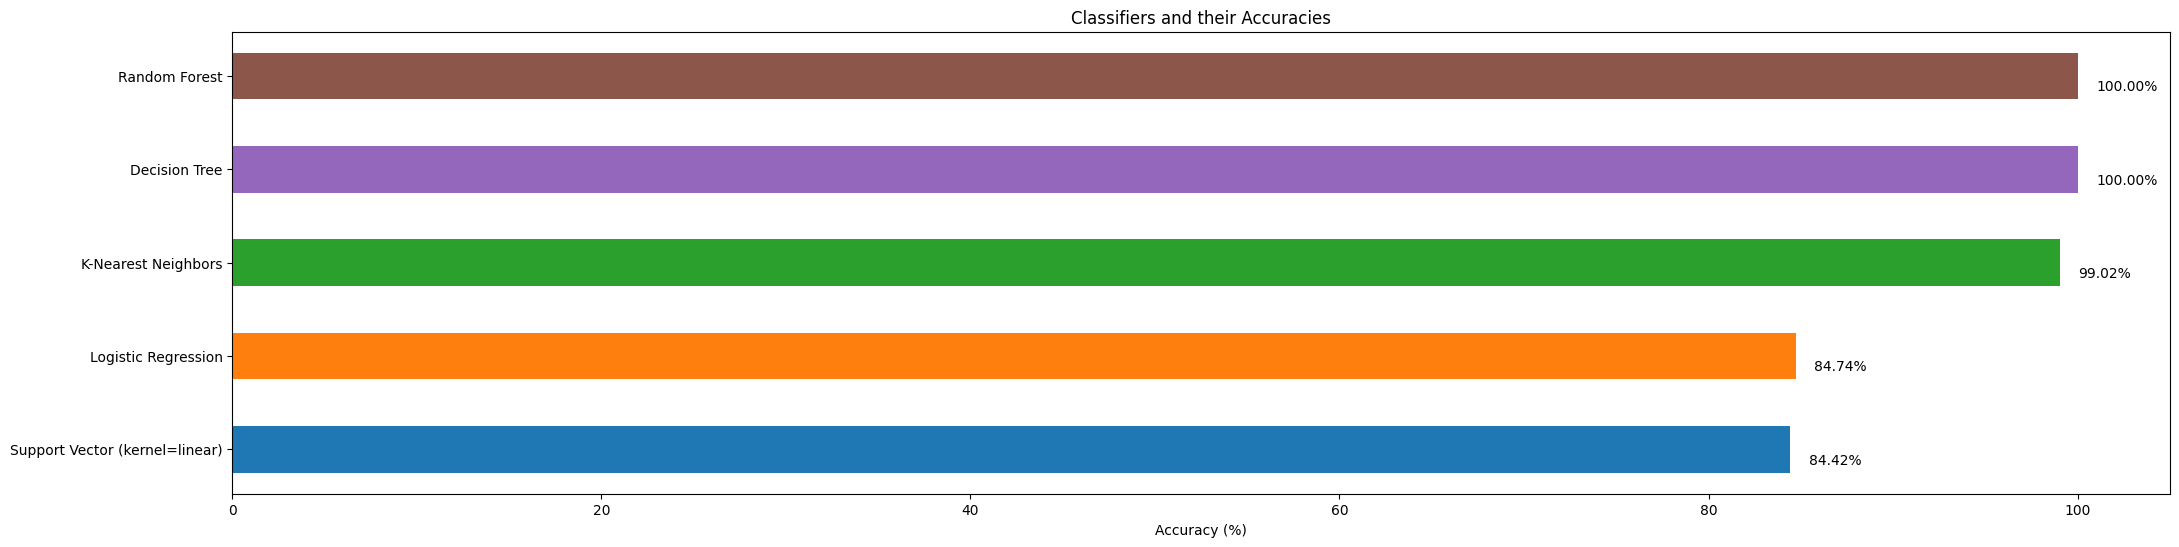

In [ ]:
classifiers = ['Support Vector (kernel=linear)', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [84.42, 99.02, 100, 84.74, 100]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']

sorted_classifiers, sorted_accuracies = zip(*sorted(zip(classifiers, accuracies), key=lambda x: x[1]))

fig, ax = plt.subplots(figsize=(25, 6))
bars = ax.barh(sorted_classifiers, sorted_accuracies, color=colors, height=0.5)

for bar, value in zip(bars, sorted_accuracies):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2 - 0.10, f'{value:.2f}%', va='center_baseline', fontsize=10)

ax.set_xlabel("Accuracy (%)")
ax.set_title("Classifiers and their Accuracies")

plt.show()
